# Proyek PBA oleh Kelompok Impostor

Sentiment Analysis for Amazon Food Review Using SVM

In [3]:
import pandas as pd
import numpy as np
import string
import csv
import re
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
pd.set_option('display.max_colwidth', 200)

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# Load Data

In [4]:
dataset = pd.read_csv("./Reviews.csv",error_bad_lines=False)

In [5]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [6]:
dataset.shape

(568454, 10)

In [7]:
dataset.info

<bound method DataFrame.info of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulness

In [8]:
dataset.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [9]:
dataset.Text.head()

0    I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1             Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2    This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...
3    If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The fl...
4                                                               Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taff

In [10]:
#Dropping the unwanted columns from our data frame.
dataset.drop("Id", inplace=True, axis=1)
dataset.drop("ProductId", inplace=True, axis=1)
dataset.drop("ProfileName", inplace=True, axis=1)
dataset.drop("HelpfulnessNumerator", inplace=True, axis=1)
dataset.drop("HelpfulnessDenominator", inplace=True, axis=1)
dataset.drop("Time", inplace=True, axis=1)
dataset.head()

,UserId,Score,Summary,Text
0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,A1D87F6ZCVE5NK,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,ABXLMWJIXXAIN,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,A1UQRSCLF8GW1T,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [11]:
#Make all 'Score' less than 3 equal to -ve class and 
# 'Score' greater than 3 equal to +ve class.
dataset.loc[dataset['Score']<3, 'Score'] = [0]
dataset.loc[dataset['Score']>3, 'Score'] = [1]

In [12]:
dataset.head()

,UserId,Score,Summary,Text
0,A3SGXH7AUHU8GW,1,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,A1D87F6ZCVE5NK,0,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,ABXLMWJIXXAIN,1,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,A395BORC6FGVXV,0,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,A1UQRSCLF8GW1T,1,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [13]:
total_size=len(dataset)

train_size=int(0.70*total_size)

#untuk training dataset
train=dataset.head(train_size)
#untuk test dataset
test=dataset.tail(total_size - train_size)

In [14]:
train.Score.value_counts()

1    310044
0     57969
3     29904
Name: Score, dtype: int64

In [15]:
test.Score.value_counts()

1    133733
0     24068
3     12736
Name: Score, dtype: int64

In [16]:
# menghapus semua baris dimana nilai sama dengan 3
train = train[train.Score != 3]
test = test[test.Score != 3]

In [17]:
print(train.shape)
print(test.shape)

(368013, 4)
(157801, 4)


In [18]:
train['Score'].value_counts()

1    310044
0     57969
Name: Score, dtype: int64

In [19]:
test.Score.value_counts()

1    133733
0     24068
Name: Score, dtype: int64

# Explore Data

Pada tahap eksplorasi data akan dilakukan visualisasi review customer menggunakan Word Cloud. Word cloud (atau disebut juga tag cloud) adalah representasi visual dari data teks, biasanya digunakan untuk menggambarkan metadata atau untuk memvisualisasikan suatu bentuk teks secara bebas. Wordcloud (atau Tag cloud) adalah representasi visual dari data teks ini.  Ini menampilkan daftar kata dengan berbagai ukuran font atau warna yang berguna untuk memahami istilah yang paling menonjol dengan cepat 

In [18]:
! pip install wordcloud

You should consider upgrading via the 'c:\users\lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [21]:
# Merancang data frame "review" untuk ,menampilkan hasil eksplorasi data untuk dianalisis
review = dataset
# Menghilangkan nilai null
review.dropna(inplace=True)

In [22]:
#Membangun nilai (score) pada setiap review
score_1 = review[review['Score'] == 1]
score_2 = review[review['Score'] == 2]
score_3 = review[review['Score'] == 3]
score_4 = review[review['Score'] == 4]
score_5 = review[review['Score'] == 5]

In [23]:
sampel = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
sampel.reset_index(drop=True,inplace=True)

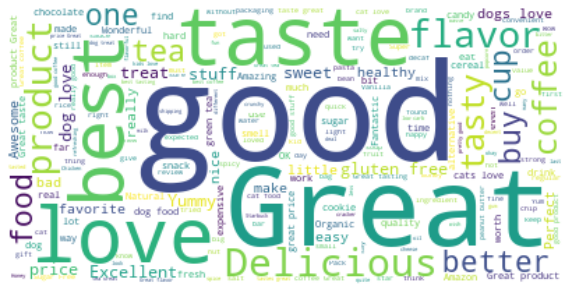

In [25]:
#WordCloud membutuhkan inputan single string dari teks
#Ringkasan review akan digabungkan menjadi single string
# similarly akan dibangun melalui atribut Text
review_str = sampel.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(review_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Split review yang bersifat buruk dengan score 1 dan 2 serta review baik dengan score 4 dan 5.
bad_reviews = sampel[sampel['Score'].isin([1,2]) ]
good_reviews = sampel[sampel['Score'].isin([4,5]) ]
# Transform menjadi single string
bad_reviews_str = bad_reviews.Summary.str.cat()
good_reviews_str = good_reviews.Summary.str.cat()

Text(0.5, 1.0, 'Review dengan Score Buruk')

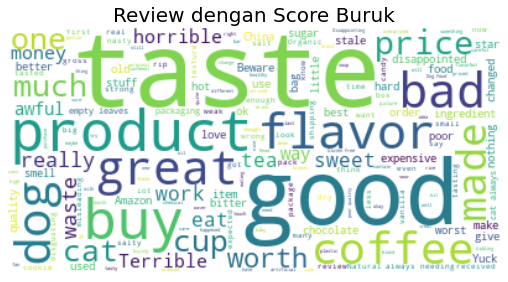

In [28]:
wordcloud_bad = WordCloud(background_color='white').generate(bad_reviews_str)
wordcloud_good = WordCloud(background_color='black').generate(good_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_bad,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Review dengan Score Buruk',fontsize=20)

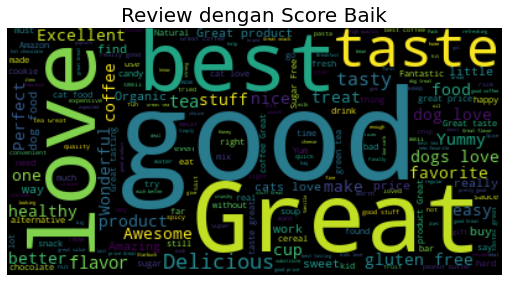

In [29]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_good,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Review dengan Score Baik',fontsize=20)
plt.show()

### Analysis on Score (Target Variable)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568427 entries, 0 to 568453
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   UserId   568427 non-null  object
 1   Score    568427 non-null  int64 
 2   Summary  568427 non-null  object
 3   Text     568427 non-null  object
dtypes: int64(1), object(3)
memory usage: 21.7+ MB


In [31]:
dataset = dataset[dataset['Score'] != 3]
dataset.shape 
#Checking to see how much % of data still remains
print(f'Remaining data is {((dataset.shape[0]*1.0)/(dataset.shape[0]*1.0))*100}')

Remaining data is 100.0


In [32]:
score = dataset['Score'].apply(lambda x: 1 if x > 3 else 0)
dataset['Score'] = score
dataset.head(3)

,UserId,Score,Summary,Text
0,A3SGXH7AUHU8GW,1,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,A1D87F6ZCVE5NK,0,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,ABXLMWJIXXAIN,1,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."


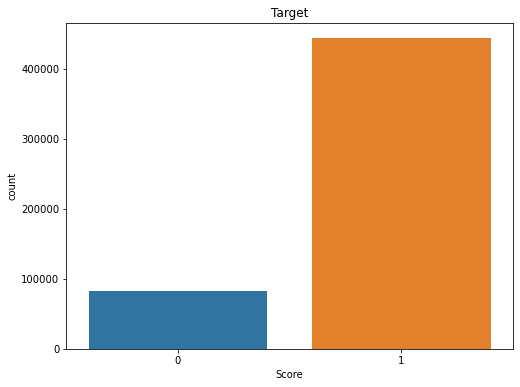

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(dataset['Score'])
plt.title('Target')
plt.show()

### Analysis On ProductId and UserId

In [29]:
df = pd.read_csv("./Reviews.csv",error_bad_lines=False)

In [36]:
# we will see the products brought by each customer

purchases = df[['ProductId','UserId']].groupby('UserId').agg({'ProductId': ['count']})
purchases.columns = ['No_of_products_purchased']
purchases = purchases.reset_index()
purchases.head(2)

,UserId,No_of_products_purchased
0,#oc-R103C0QSV1DF5E,1
1,#oc-R109MU5OBBZ59U,1


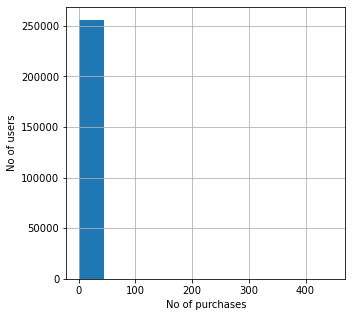

count    256059.000000
mean          2.220012
std           4.443361
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         448.000000
Name: No_of_products_purchased, dtype: float64


In [37]:
plt.figure(figsize=(5,5))
purchases['No_of_products_purchased'].hist()
plt.xlabel('No of purchases')
plt.ylabel('No of users')
plt.show()
print(purchases['No_of_products_purchased'].describe())

### Analyisis of Reviews over time

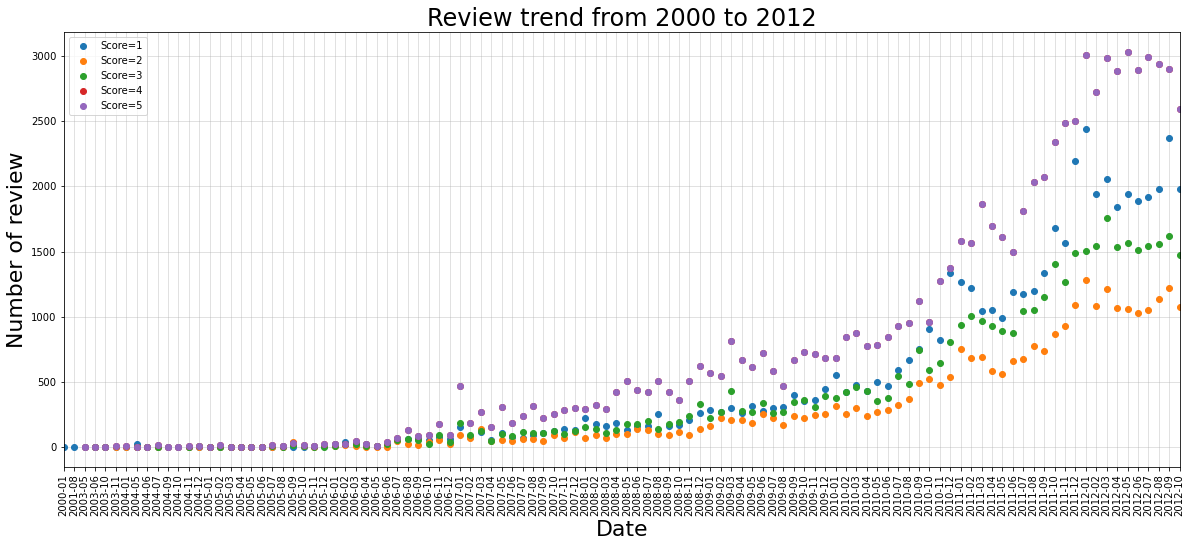

In [38]:
df['date'] = pd.to_datetime(df['Time'],unit='s')
dff = df[['date','Text','Score']]
dff.date = df.date.dt.strftime('%Y-%m')
# dff['date'] = dff['date'].dt.to_timestamp()
dff = dff.sort_values(by=['date']).reset_index(drop=True)
dff_1 = dff[dff['Score'] == 1]
dff_2 = dff[dff['Score'] == 2]
dff_3 = dff[dff['Score'] == 3]
dff_4 = dff[dff['Score'] == 4]
dff_5 = dff[dff['Score'] == 5]

dff_1 = dff_1.groupby('date')['Score'].count().reset_index()
dff_2 = dff_2.groupby('date')['Score'].count().reset_index()
dff_3 = dff_3.groupby('date')['Score'].count().reset_index()
dff_5 = dff_4.groupby('date')['Score'].count().reset_index()
dff_4 = dff_4.groupby('date')['Score'].count().reset_index()

plt.figure(figsize=(20,8))

plt.plot_date(x=dff_1['date'],y=dff_1['Score'],label='Score=1')
plt.plot_date(x=dff_2['date'],y=dff_2['Score'],label='Score=2')
plt.plot_date(x=dff_3['date'],y=dff_3['Score'],label='Score=3')
plt.plot_date(x=dff_4['date'],y=dff_4['Score'],label='Score=4')
plt.plot_date(x=dff_5['date'],y=dff_5['Score'],label='Score=5')
plt.grid(linewidth=0.5,alpha=0.75)
plt.xticks(rotation=90)
plt.xlim('2000-01','2012-10')
plt.xlabel('Date',fontsize=22)
plt.ylabel('Number of review',fontsize=22)
plt.title('Review trend from 2000 to 2012',fontsize=24);
plt.savefig('review_trend.png')
plt.legend()
plt.show()

# Text Pre-Processing

Text Preprocessing akan menggunakan TextBlob Library. Dalam Text Preprocessing akan dilakukan convert into lower cases, remove punctuations, remove stop words, remove HTML tags, remove special characters, lemmatization, dan stemming

In [39]:
! pip install textblob

You should consider upgrading via the 'c:\users\lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [40]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

In [20]:
lst_text = train['Text'].tolist()
lst_summary = train['Summary'].tolist()

In [21]:
test_text = test['Text'].tolist()

## Convert Into Lower Case

In [22]:
#digunakan untuk mengkonversi semua daftar ke lowercase
lst_text = [str(item).lower() for item in lst_text]
lst_summary = [str(item).lower() for item in lst_summary]

In [23]:
test_text = [str(item).lower() for item in test_text]

In [30]:
# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [31]:
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(7)

0    i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrad...
1                    product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo
2    this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts  in this case filberts and it is cut into tiny squares and then liberally coated with powde...
3    if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which was good and made some cherry soda the flavor i...
4                                                                       great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a ta

## Remove Stopwords

In [26]:
#Melakukan penghapusan semua Stop Words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#word_tokenize menerima sebuah string sebagai masukan bukan sebuah file
stop_words = set(stopwords.words('english'))
for i in range(len(lst_text)):
    text_filtered = []
    summary_filtered = []
    text_word_tokens = []
    summary_word_tokens = []
    text_word_tokens = lst_text[i].split()
    summary_word_tokens = lst_summary[i].split()
    for r in text_word_tokens:
        if not r in stop_words:
            text_filtered.append(r)
    lst_text[i] = ' '.join(text_filtered)
    for r in summary_word_tokens:
        if not r in stop_words:
            summary_filtered.append(r)
    lst_summary[i] = ' '.join(summary_filtered)

In [27]:
for i in range(len(test_text)):
    text_filtered = []
    text_word_tokens = []
    text_word_tokens = test_text[i].split()
    for r in text_word_tokens:
        if not r in stop_words:
            text_filtered.append(r)
    test_text[i] = ' '.join(text_filtered)

In [32]:
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head()

0                                       bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
1                                                                   product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted sure error vendor intended represent product jumbo
2    confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...
3                                                                           looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal
4                                                                                                                        great taffy great price wide assortment yummy taffy deliver

## Remove HTML Tags

In [33]:
#dilakukan untuk menghapus semua HTML Tags yang ada pada List
import re
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

for i in range(len(lst_text)):
    lst_text[i] = striphtml(lst_text[i])
    lst_summary[i] = striphtml(lst_summary[i])

In [34]:
for i in range(len(test_text)):
    test_text[i] = striphtml(test_text[i])

In [35]:
lst_text[0:5]

['bought several vitality canned dog food products found good quality. product looks like stew processed meat smells better. labrador finicky appreciates product better most.',
 'product arrived labeled jumbo salted peanuts...the peanuts actually small sized unsalted. sure error vendor intended represent product "jumbo".',
 'confection around centuries. light, pillowy citrus gelatin nuts - case filberts. cut tiny squares liberally coated powdered sugar. tiny mouthful heaven. chewy, flavorful. highly recommend yummy treat. familiar story c.s. lewis\' "the lion, witch, wardrobe" - treat seduces edmund selling brother sisters witch.',
 'looking secret ingredient robitussin believe found it. got addition root beer extract ordered (which good) made cherry soda. flavor medicinal.',
 'great taffy great price. wide assortment yummy taffy. delivery quick. taffy lover, deal.']

## Remove Special Characters

In [36]:
#Dilakukan penghapusan spesial karakter dari setiap kalimat
for i in range(len(lst_text)):
    lst_text[i] = re.sub(r'[^A-Za-z]+', ' ', lst_text[i])
    lst_summary[i] = re.sub(r'[^A-Za-z]+', ' ', lst_summary[i])

In [37]:
for i in range(len(test_text)):
    test_text[i] = re.sub(r'[^A-Za-z]+', ' ', test_text[i])

In [38]:
lst_text[0:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better most ',
 'product arrived labeled jumbo salted peanuts the peanuts actually small sized unsalted sure error vendor intended represent product jumbo ',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c s lewis the lion witch wardrobe treat seduces edmund selling brother sisters witch ',
 'looking secret ingredient robitussin believe found it got addition root beer extract ordered which good made cherry soda flavor medicinal ',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal ']

## Lemmatization

In [44]:
#Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.Text.head()

0                                          bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better
1                                                                    product arrived labeled jumbo salted peanutsthe peanut actually small sized unsalted sure error vendor intended represent product jumbo
2    confection around century light pillowy citrus gelatin nut case filbert cut tiny square liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar s...
3                                                                           looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal
4                                                                                                                        great taffy great price wide assortment yummy taffy deliver

## Stemming

Stemming yang digunakan pada proyek ini menggunakan Snowball

## Snowball Stemming

In [45]:
#pada bagian ini akan dilakukan stem pada setiap kata.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
for i in range(len(lst_text)):
    text_filtered = []
    summary_filtered = []
    text_word_tokens = []
    summary_word_tokens = []
    text_word_tokens = lst_text[i].split()
    summary_word_tokens = lst_summary[i].split()
    for r in text_word_tokens:
        text_filtered.append(str(stemmer.stem(r)))
    lst_text[i] = ' '.join(text_filtered)
    for r in summary_word_tokens:
        summary_filtered.append(str(stemmer.stem(r)))
    lst_summary[i] = ' '.join(summary_filtered)

In [46]:
for i in range(len(test_text)):
    text_filtered = []
    text_word_tokens = []
    text_word_tokens = test_text[i].split()
    for r in text_word_tokens:
        if not r in stop_words:
            text_filtered.append(str(stemmer.stem(r)))
    test_text[i] = ' '.join(text_filtered)

In [48]:
lst_text[0:5]

['bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better most',
 'product arriv label jumbo salt peanut the peanut actual small size unsalt sure error vendor intend repr product jumbo',
 'confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori c s lewi the lion witch wardrob treat seduc edmund sell brother sister witch',
 'look secret ingredi robitussin believ found it got addit root beer extract order which good made cherri soda flavor medicin',
 'great taffi great price wide assort yummi taffi deliveri quick taffi lover deal']

In [49]:
test_text[0:5]

['noodl packet fantast much healthier ramen noodl lower fat price pretti decent qualiti much higher well',
 'live remot area order salt anchovi wife could make tradit korean kimchi perfect exact look order ship within hour product realli pack well would breakag need anchovi salad pizza kimchi give meal burst flavor realli delici gourmet qualiti',
 'may think like anchovi never anchovi pack salt anchovi come us famous amalfi coast itali delici anchovi flavor one ten usual tin anchovi fillet use pizza pasta pesto anywh el bit lot anchovi flavor welcom littl bit goe long way take jar rin cold water alreadi slice open stomach unless like anchovi crunchier want finish fillet job cut head tail slice rest way open care peel littl fishi spine rib coupl bit squidgi fish organ also scrape scale like awar flavor strong may take long time use whole jar jar open use quick might want consid store smaller jar contain cover salt mayb oliv oil tight seal plan divid next jar smaller portion tri freez ed

# 3. Vektorisasi pada Dataset

Vektorisasi yang merupakan proses umum dari mengubah koleksi teks dokumen kedalam fitur vektor yang numerikal. Strategi spesifik (tokenisasi, counting, dan normalisasi) yang disebut dengan Bag of Words atau Bag of n g-rams. Dokumen di deskripsikan oleh kejadi Word 

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(lst_text)


In [51]:
X_train_dtm

<368013x73328 sparse matrix of type '<class 'numpy.int64'>'
	with 12433945 stored elements in Compressed Sparse Row format>

Untuk membuat sebuah prediksi oberservasi baru harus memiliki fitur yang sama dengan observasi pelatihan.

In [52]:
# melakukan transformasi pada testing data (using fitted vocabulary) kedalam dokumen-term matriks
X_test_dtm = vect.transform(test_text)
X_test_dtm

<157801x73328 sparse matrix of type '<class 'numpy.int64'>'
	with 4913036 stored elements in Compressed Sparse Row format>

1. vect.fit(lst_text) belajar dengan kosakata dari training data
2. vect.transform(lst_text) belajar dengan kosakata yang pas untuk membangun document-term matrix  dari training data
3. vect.transform(test_text) belajar dengan kosakata yang pas to build a document-term matrix dari testing data (dan  mengacuhkan tokens yang tidak pernah dilihat sebelumnya

# 4: Membangun dan mengevaluasi  model

### Evaluation Metrics

Evaluation atau pengujian dilakukan dengan membagi data ke dalam data training dan data testing. Metode pengujian merupakan penilaian seberapa baik proses identifikasi pada sistem dengan menggunakan rumus umum perhitungan accuracy, precision, recall, dan F-score yang diperkenalkan oleh Baeza-Yates & Ribeiro-Neto. 

Keterangan:
-	True Positif (TP) adalah kondisi data dengan label positif berhasil diidentifikasi sebagai kalimat positif
-	False Positif (FP) adalah kondisi data dengan label positif gagal diidentifikasi sebagai kalimat positif
-	True Negatif (TN) adalah kondisi data dengan label negatif berhasil diidentifikasi sebagai kalimat negatif
-	False Negatif (FN) adalah kondisi data dengan label negatif gagal diidentifikasi sebagai kalimat negatif
-	True Netral (TN) adalah kondisi data dengan label netral berhasil diidentifikasi sebagai kalimat netral
-	False Netral (FN) adalah kondisi data dengan label netral gagal diidentifikasi sebagai kalimat netral


### Multinomial Naive Bayes

Disini digunakan Multinomial Naive Bayes dimana sesuai untuk klasfikasi dengan fitur yang diskrit (seperti : word counts for text classification).

In [53]:
# dilakukan import model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [54]:
# train model menggunkan X_train_dtm
%time nb.fit(X_train_dtm, train.Score)

Wall time: 344 ms


MultinomialNB()

In [55]:
# dilakukan pembuatan kelas prediksi untuk X_test_dtm
y_pred_class_nb = nb.predict(X_test_dtm)

In [56]:
# lakukan kalkulasi
from sklearn import metrics
metrics.accuracy_score(test.Score, y_pred_class_nb)

0.9075734627790698

In [57]:
# lakukan pencetakan confusion matrix
con_metrics_nb = metrics.confusion_matrix(test.Score, y_pred_class_nb)
con_metrics_nb

array([[ 16434,   7634],
       [  6951, 126782]], dtype=int64)

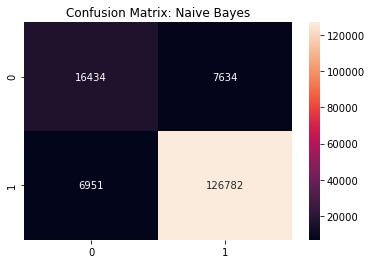

In [58]:
#ploting heatmap untuk confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metrics_nb, annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

In [59]:
#lakukan pengecakan pada Precision, Recall and F1 Score
from sklearn.metrics import classification_report
print (classification_report(test.Score, y_pred_class_nb))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     24068
           1       0.94      0.95      0.95    133733

    accuracy                           0.91    157801
   macro avg       0.82      0.82      0.82    157801
weighted avg       0.91      0.91      0.91    157801



In [60]:
# calculate AUC - Method 1
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test.Score, y_pred_class_nb)
print (metrics.auc(false_positive_rate, true_positive_rate))

0.815419328323861


In [61]:
# calculate AUC _ Method - 2
auc_nb = metrics.roc_auc_score(test.Score, y_pred_class_nb)
print(auc_nb)

0.815419328323861


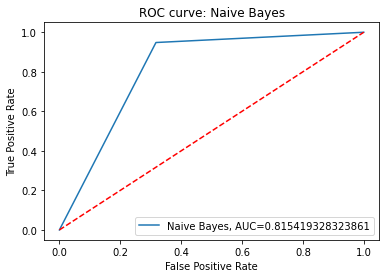

In [62]:
#Plotting Area Under the Curve
plt.plot(false_positive_rate,true_positive_rate,label="Naive Bayes, AUC="+str(auc_nb))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve: Naive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()